<a href="https://colab.research.google.com/github/CaptainOmerica/My-Projects/blob/master/Siamese_Network_Proof_of_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import keras
import os

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
# Load the models with ImageNet weights
model = VGG16(weights='imagenet', include_top=False)
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#pic1 = target state
pic1_path='/content/drive/MyDrive/image_67169793.JPG'
pic1 = cv2.imread(pic1_path)
b,g,r = cv2.split(pic1)           # get b, g, r
pic1 = cv2.merge([r,g,b])     # switch it to r, g, b
pic1 = cv2.resize(pic1, (224,224))
pic1 = cv2.blur(pic1, (5,5))



#pic2 = a little further away from target state
pic2_path='/content/drive/MyDrive/image_67129089.JPG'
pic2 = cv2.imread(pic2_path)
b,g,r = cv2.split(pic2)           # get b, g, r
pic2 = cv2.merge([r,g,b])     # switch it to r, g, b
pic2 = cv2.resize(pic2, (224,224))
pic2 = cv2.resize(pic2, (224,224))
pic2 = cv2.blur(pic2, (5,5))



#pic3 = the farthest away from target state
pic3_path='/content/drive/MyDrive/image_67159553.JPG'
pic3 = cv2.imread(pic3_path)
b,g,r = cv2.split(pic3)           # get b, g, r
pic3 = cv2.merge([r,g,b])     # switch it to r, g, b
pic3 = cv2.resize(pic3, (224,224))
pic3 = cv2.resize(pic3, (224,224))
pic3 = cv2.blur(pic3, (5,5))


(-0.5, 223.5, 223.5, -0.5)

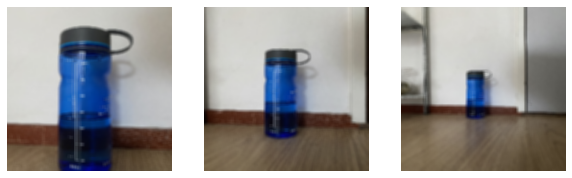

In [7]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 3, 1)
plt.imshow(pic1)
plt.axis('off')
fig.add_subplot(1, 3, 2)
plt.imshow(pic2)
plt.axis('off')
fig.add_subplot(1, 3, 3)
plt.imshow(pic3)
plt.axis('off')

In [8]:
trajectory=[pic1,pic2,pic3]

**Feeding the 3 Pictures into VGG16 Neural Network to for Feature Extraction**


> Note: Pic1 is also the "Goal" State



The images need to be normalized before being fed into VGG16

In [9]:
#Defining a Normalize Function
def normalise_images(images):

    # Convert to numpy arrays
    images = np.array(images, dtype=np.float32)

    # Normalise the images
    images /= 255
    
    return images

In [10]:
#Normalizing the images
trajectory_normd=normalise_images(trajectory);

Displaying Normalized Images

(-0.5, 223.5, 223.5, -0.5)

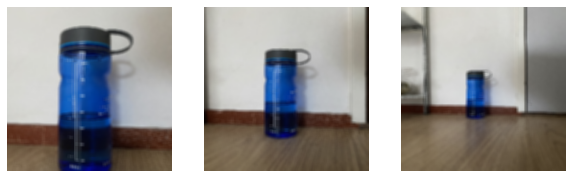

In [11]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 3, 1)
plt.imshow(trajectory_normd[0])
plt.axis('off')
fig.add_subplot(1, 3, 2)
plt.imshow(trajectory_normd[1])
plt.axis('off')
fig.add_subplot(1, 3, 3)
plt.imshow(trajectory_normd[2])
plt.axis('off')

Feeding the 3 images into Vgg16 for feature extraction

In [12]:
#Feature Extraction on Trajectory
tensor_list=[]
for pic in trajectory:
  pic = np.expand_dims(pic, axis=0)
  tensor= model.predict(pic)
  tensor_np= np.array(tensor)
  tensor_list.append(tensor_np.flatten())

Computing Similarity between Target Image and image Little Further Away

(-0.5, 223.5, 223.5, -0.5)

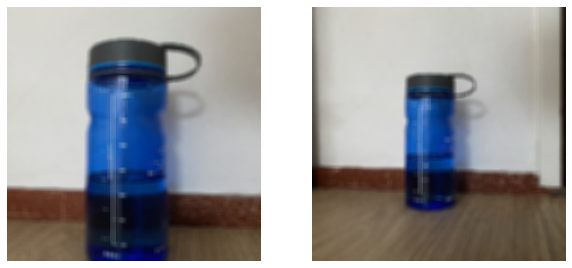

In [13]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(trajectory_normd[0])
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(trajectory_normd[1])
plt.axis('off')

In [14]:
sum(np.square(tensor_list[0]-tensor_list[1]))/1000000

1.836040940060916

"Similarity" between Target and Farthest Image

(-0.5, 223.5, 223.5, -0.5)

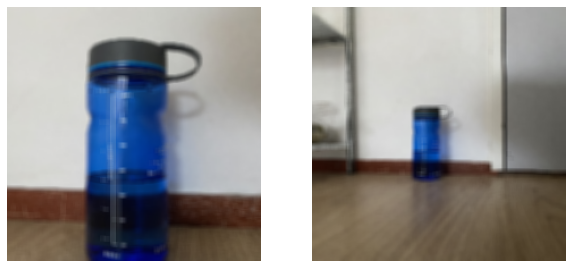

In [15]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(trajectory_normd[0])
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(trajectory_normd[2])
plt.axis('off')

In [16]:
sum(np.square(tensor_list[0]-tensor_list[2]))/1000000

2.3695663810180707

In [28]:
dim=tensor_list[0].ndim 
size=np.size(tensor_list[0])
print('Each photo is a '+str(dim)+' dimensional tensor of size ' + str(size) )

Each photo is a 1 dimensional tensor of size 25088


REALLLLYYYY Far Away

(-0.5, 223.5, 223.5, -0.5)

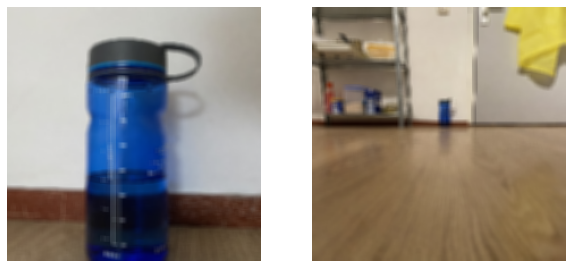

In [18]:
pic5_path='/content/drive/MyDrive/image_67183873.JPG'
pic5 = cv2.imread(pic5_path)
b,g,r = cv2.split(pic5)           # get b, g, r
pic5 = cv2.merge([r,g,b])     # switch it to r, g, b
pic5 = cv2.resize(pic5, (224,224))
pic5 = cv2.blur(pic5, (5,5))
###################################
pic5_normd=normalise_images(pic5)
#####################################
pic5 = np.expand_dims(pic5_normd, axis=0)
pic5_tensor= model.predict(pic5)
pic5_tensor_np= np.array(pic5_tensor).flatten()
##################################3
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(trajectory_normd[0])
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(pic5_normd)
plt.axis('off')

In [19]:
sum(np.square(tensor_list[0]-pic5_tensor_np))/1000000
#SHOULD BE NORMALIZED BETWEEN 0 and 1

1.9748898101185266

Clearly doesn't work too well with other features around!

(-0.5, 223.5, 223.5, -0.5)

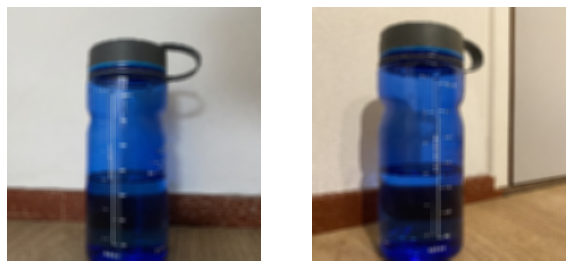

In [20]:
pic5_path='/content/drive/MyDrive/image_67178753.JPG'
pic5 = cv2.imread(pic5_path)
b,g,r = cv2.split(pic5)           # get b, g, r
pic5 = cv2.merge([r,g,b])     # switch it to r, g, b
pic5 = cv2.resize(pic5, (224,224))
pic5 = cv2.blur(pic5, (5,5))
###################################
pic5_normd=normalise_images(pic5)
#####################################
pic5 = np.expand_dims(pic5_normd, axis=0)
pic5_tensor= model.predict(pic5)
pic5_tensor_np= np.array(pic5_tensor).flatten()
##################################3
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(trajectory_normd[0])
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(pic5_normd)
plt.axis('off')

In [21]:
sum(np.square(tensor_list[0]-pic5_tensor_np))/1000000
#SHOULD BE NORMALIZED BETWEEN 0 and 1

1.9297243787751914

(-0.5, 223.5, 223.5, -0.5)

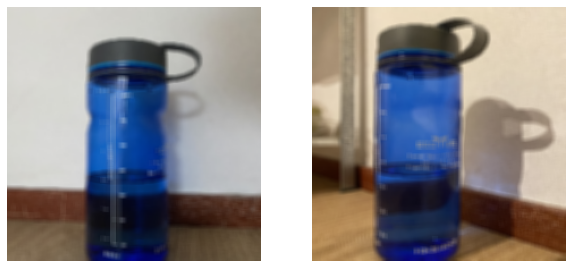

In [22]:

pic5_path='/content/drive/MyDrive/image_67153153.JPG'
pic5 = cv2.imread(pic5_path)
b,g,r = cv2.split(pic5)           # get b, g, r
pic5 = cv2.merge([r,g,b])     # switch it to r, g, b
pic5 = cv2.resize(pic5, (224,224))
pic5 = cv2.blur(pic5, (5,5))
###################################
pic5_normd=normalise_images(pic5)
#####################################
pic5 = np.expand_dims(pic5_normd, axis=0)
pic5_tensor= model.predict(pic5)
pic5_tensor_np= np.array(pic5_tensor).flatten()
##################################3
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(trajectory_normd[0])
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(pic5_normd)
plt.axis('off')

In [23]:
sum(np.square(tensor_list[0]-pic5_tensor_np))/1000000

1.937913380317374

Next Step: Applying this to DQN